<a href="https://colab.research.google.com/github/jangInw007/dataviz2025/blob/main/Visualize_Data_Comparison_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv'

In [57]:
data = pd.read_csv(path)
data.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


#Quiz 12 สร้างตารางที่แสดงความถี่ของจำนวนตำรวจ case ที่จับโดยตำรวจเชื้อชาติต่างๆ

In [6]:
compared_police_eth = data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth

,Officer-defined ethnicity,Type
0,Asian,81
1,Black,64
2,Other,9
3,White,199


## Bar chart (กราฟแท่ง) (กราฟผลไม้)

<BarContainer object of 4 artists>

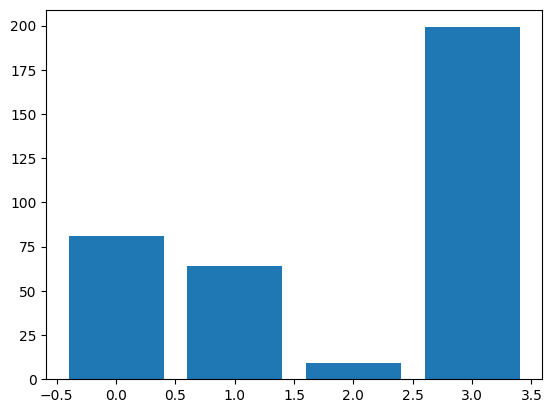

In [8]:
import matplotlib.pyplot as plt
plt.bar(compared_police_eth.index, compared_police_eth ['Type'])

ใส่ชื่อคอลัมไปเลย

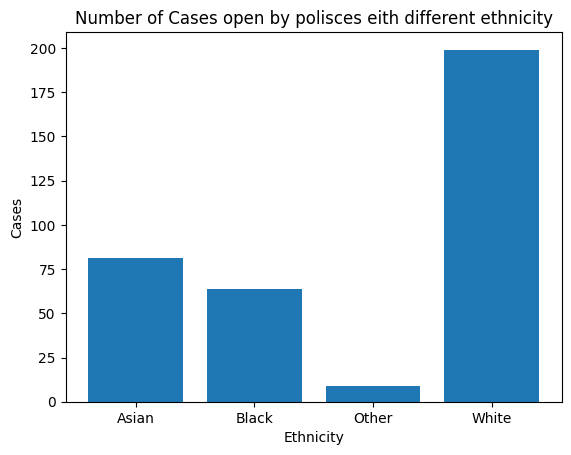

In [9]:
plt.bar(compared_police_eth['Officer-defined ethnicity'], compared_police_eth ['Type']);
plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.title('Number of Cases open by polisces eith different ethnicity');

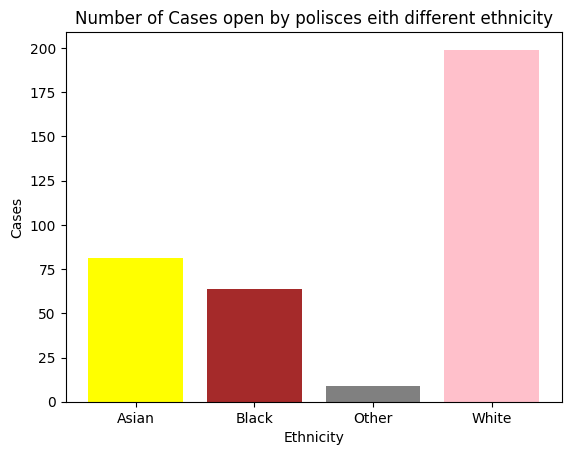

In [10]:
plt.bar(compared_police_eth['Officer-defined ethnicity'], compared_police_eth['Type'], color=['yellow', 'brown', 'grey', 'pink'])
plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.title('Number of Cases open by polisces eith different ethnicity');

## Stacked barchart

In [11]:
data1 = pd.read_csv('/content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Python&DataViz2025/Data/2025-02/2025-02-bedfordshire-stop-and-search.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Python&DataViz2025/Data/2025-03/2025-03-bedfordshire-stop-and-search.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Python&DataViz2025/Data/2025-04/2025-04-bedfordshire-stop-and-search.csv')

In [12]:
compared_police_eth1 = data1.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')
compared_police_eth2 = data2.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')
compared_police_eth3 = data3.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')
compared_police_eth4 = data4.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')

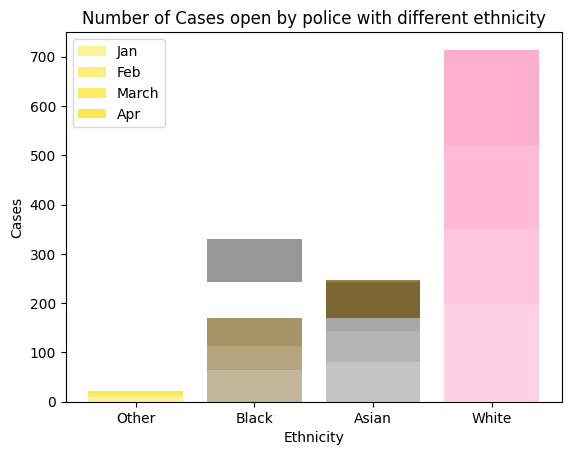

In [13]:
plt.bar(compared_police_eth1['Officer-defined ethnicity'], compared_police_eth1['Type'],
        color=[[250/255,223/255,0/255,0.4], [107/255,77/255,0/255,0.4], [107/255,108/255,109/255,0.4], [255/255, 141/255, 186/255,0.4]],
        label ='Jan')
plt.bar(compared_police_eth2['Officer-defined ethnicity'], compared_police_eth2['Type'],
        bottom = compared_police_eth1['Type'],
        color=[[250/255,223/255,0/255,0.5], [107/255,77/255,0/255,0.5], [107/255,108/255,109/255,0.5], [255/255, 141/255, 186/255,0.5]],
        label ='Feb')
plt.bar(compared_police_eth3['Officer-defined ethnicity'], compared_police_eth3['Type'],
        bottom = compared_police_eth1['Type']+compared_police_eth2['Type'],
        color=[[250/255,223/255,0/255,0.6], [107/255,77/255,0/255,0.6], [107/255,108/255,109/255,0.6], [255/255, 141/255, 186/255,0.6]],
        label ='March')
plt.bar(compared_police_eth4['Officer-defined ethnicity'], compared_police_eth4['Type'],
        bottom = compared_police_eth1['Type']+compared_police_eth2['Type']+compared_police_eth3['Type'],
        color=[[250/255,223/255,0/255,0.7], [107/255,77/255,0/255,0.7], [107/255,108/255,109/255,0.7], [255/255, 141/255, 186/255,0.7]],
        label ='Apr')

plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.legend()
plt.title('Number of Cases open by police with different ethnicity');

In [14]:
compared_police_eth1 = data1.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth2 = data2.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth3 = data3.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth4 = data4.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

In [15]:
def swap_rows(tab, eth1='Asian', eth2='Other'):
    # Find the indices of 'Asian' and 'Other'
    asian_index = tab[tab['Officer-defined ethnicity'] == eth1].index[0]
    other_index = tab[tab['Officer-defined ethnicity'] == eth2].index[0]

    # Get the rows
    asian_row = tab.loc[asian_index].copy()
    other_row = tab.loc[other_index].copy()

    # Swap the rows
    tab.loc[asian_index] = other_row
    tab.loc[other_index] = asian_row

    return tab

In [16]:
compared_police_eth1 = swap_rows(compared_police_eth1)
compared_police_eth2 = swap_rows(compared_police_eth2)
compared_police_eth3 = swap_rows(compared_police_eth3)
compared_police_eth4 = swap_rows(compared_police_eth4)

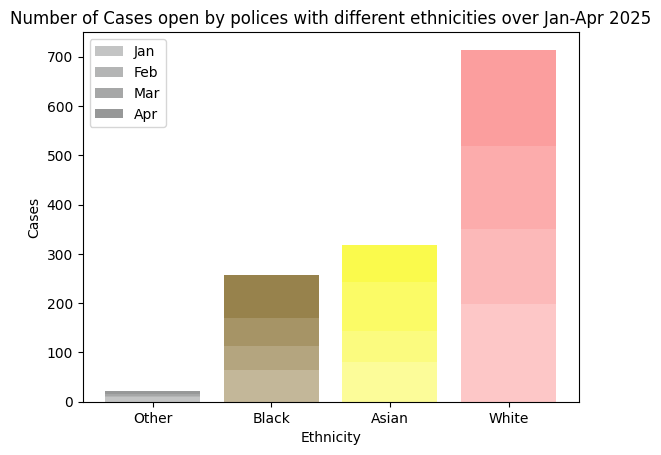

In [17]:
import matplotlib.pyplot as plt

plt.bar(compared_police_eth1['Officer-defined ethnicity'], compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.4], [107/255,77/255,0,0.4], [249/255,249/255,0,0.4], [250/255,117/255,117/255,0.4]]
        ,label='Jan')
plt.bar(compared_police_eth2['Officer-defined ethnicity'], compared_police_eth2['Type']
        , bottom = compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.5], [107/255,77/255,0,0.5], [249/255,249/255,0,0.5], [250/255,117/255,117/255,0.5]]
        , label='Feb')
plt.bar(compared_police_eth3['Officer-defined ethnicity'], compared_police_eth3['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']
        , color=[[107/255,108/255,109/255,0.6], [107/255,77/255,0,0.6], [249/255,249/255,0,0.6], [250/255,117/255,117/255,0.6]]
        , label='Mar')
plt.bar(compared_police_eth4['Officer-defined ethnicity'], compared_police_eth4['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']+ compared_police_eth3['Type']
        , color=[[107/255,108/255,109/255,0.7], [107/255,77/255,0,0.7], [249/255,249/255,0,0.7], [250/255,117/255,117/255,0.7]]
        , label='Apr')
plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.legend()
plt.title('Number of Cases open by polices with different ethnicities over Jan-Apr 2025');

# Group barchart

In [18]:
compared_police_eth1

,Officer-defined ethnicity,Type
0,Other,9
1,Black,64
2,Asian,81
3,White,199


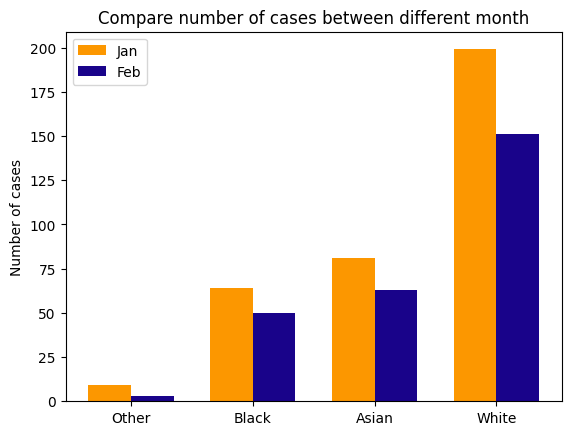

In [19]:
import numpy as np
x = np.arange(len(compared_police_eth1))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, compared_police_eth1['Type'], width, label='Jan', color = '#fc9700')
rects2 = ax.bar(x + width/2, compared_police_eth2['Type'], width, label='Feb', color = '#19038a')

ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different month')
ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])
ax.legend();

# Quiz 13
plot group barchart เปรียบเทียบจำนวนเคส 3 เดือน ของแต่ละเชื้อชาติ

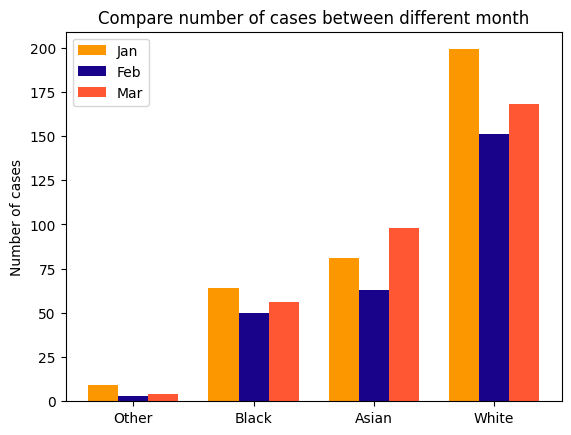

In [20]:
import numpy as np
x = np.arange(len(compared_police_eth1))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, compared_police_eth1['Type'], width, label='Jan', color = '#fc9700')
rects2 = ax.bar(x, compared_police_eth2['Type'], width, label='Feb', color = '#19038a')
rects3 = ax.bar(x + width, compared_police_eth3['Type'], width, label='Mar', color = '#FF5733')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different month')
ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])
ax.legend();

ดูเปรียบเทียบตัวมันเองว่าเกิดอะไรขึ้น

#tree map

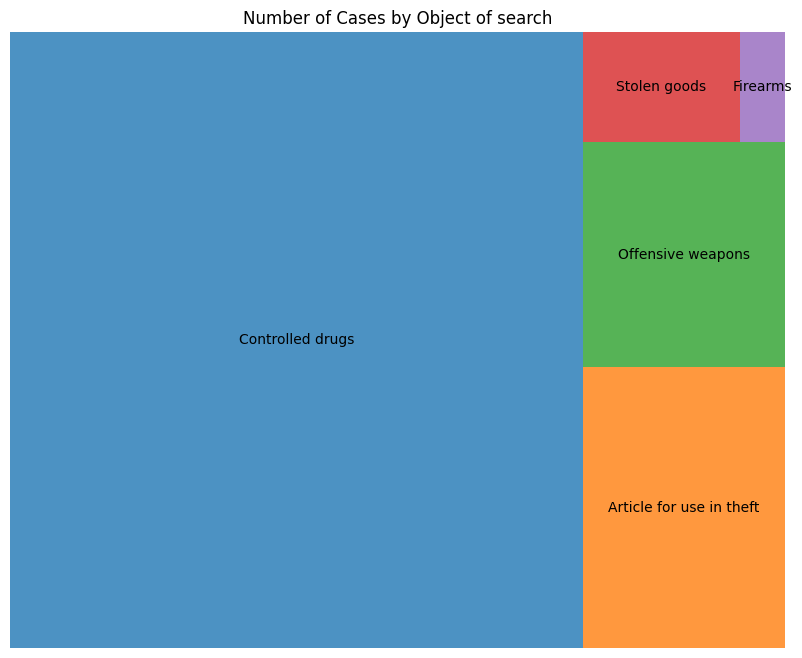

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify

import squarify

# Assuming 'allGenre' contains the list of genres you want to plot
object_of_search = data1['Object of search'].value_counts()

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=object_of_search.values, label=object_of_search.index, alpha=.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('off')
plt.title('Number of Cases by Object of search')
plt.show();

# Radar Chart



In [ ]:
# คิดคุณสมบัติ 4-5 ตัว

In [26]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [49]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [55]:
data['Object of search']

KeyError: 'Object of search'

In [50]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [51]:
values = df.iloc[:,1:].mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

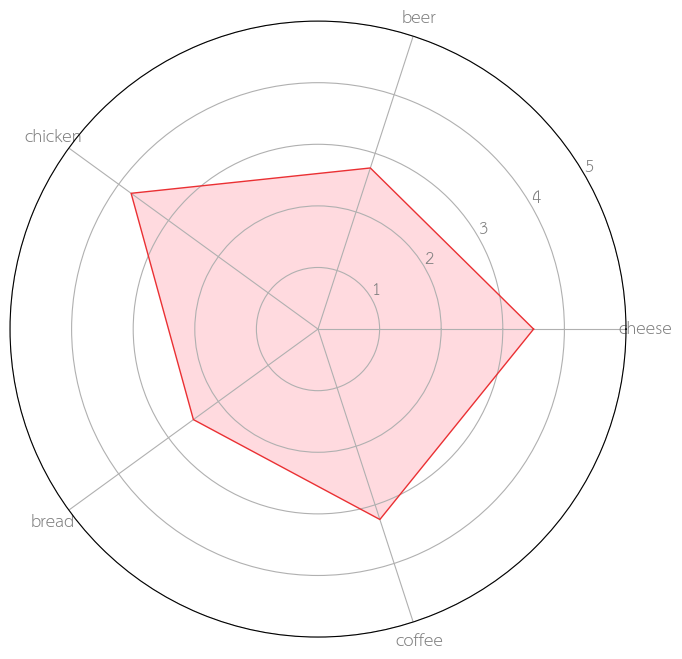

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

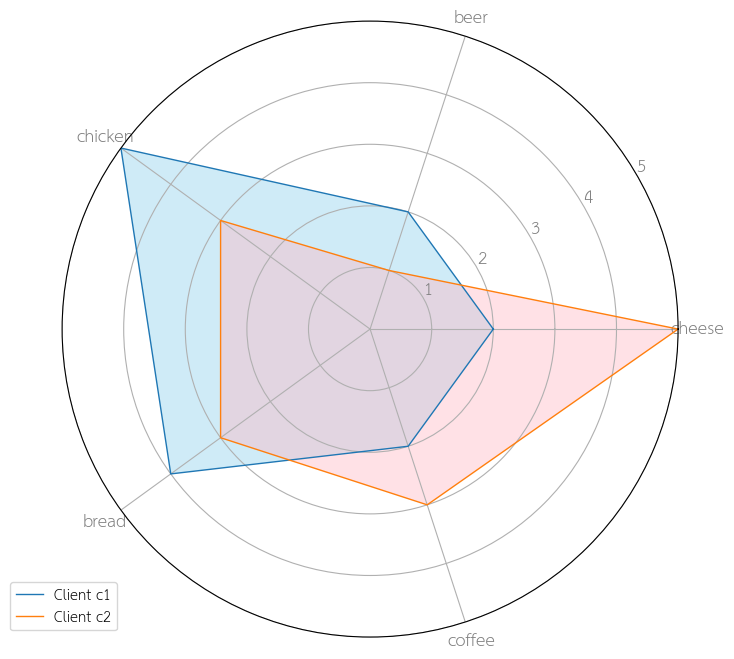

In [53]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

เปรียบเทียบจำนวน Object of search ของ bedforshire - stop and search ในเดือน 1 และเดือนที่ 2

#Quiz 14

In [101]:
path1 = '/content/drive/MyDrive/Python&DataViz2025/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv'

In [102]:
path2 = '/content/drive/MyDrive/Python&DataViz2025/Data/2025-02/2025-02-bedfordshire-stop-and-search.csv'

In [103]:
month1 = pd.read_csv(path1)
month1.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


In [104]:
month2 = pd.read_csv(path2)
#month2.head()

In [80]:
month1.isnull().sum()

,0
Type,0
Date,0
Part of a policing operation,0
Policing operation,387
Latitude,66
Longitude,66
Gender,60
Age range,36
Self-defined ethnicity,31
Officer-defined ethnicity,34


In [106]:
object_of_search_month1 = month1.groupby('Object of search')['Type'].count().reset_index()
object_of_search_month2 = month2.groupby('Object of search')['Type'].count().reset_index()

# Merge the dataframes for easier plotting
merged_object_of_search = pd.merge(object_of_search_month1, object_of_search_month2, on='Object of search', suffixes=('_Jan', '_Feb'), how='outer')

# Fill NaN values with 0 if an object of search doesn't exist in a month
merged_object_of_search = merged_object_of_search.fillna(0)

# Prepare data for scaling by melting the DataFrame
melted_data = merged_object_of_search.melt(id_vars='Object of search', value_vars=['Type_Jan', 'Type_Feb'], var_name='Month', value_name='Count')

# Apply Min-Max Scaling to the combined data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
melted_data['Count'] = scaler.fit_transform(melted_data[['Count']])

# Pivot the data back to the original format
scaled_merged_object_of_search = melted_data.pivot(index='Object of search', columns='Month', values='Count').reset_index()

# Rename columns back
scaled_merged_object_of_search.columns.name = None
scaled_merged_object_of_search = scaled_merged_object_of_search.rename(columns={'Type_Jan': 'Type_Jan', 'Type_Feb': 'Type_Feb'})


merged_object_of_search = scaled_merged_object_of_search
merged_object_of_search

,Object of search,Type_Feb,Type_Jan
0,Article for use in theft,0.069930,0.160839
1,Articles for use in criminal damage,0.006993,0.000000
2,Controlled drugs,0.765734,1.000000
3,Firearms,0.003497,0.013986
4,Offensive weapons,0.118881,0.129371
5,Stolen goods,0.038462,0.048951


In [107]:
merged_object_of_search = merged_object_of_search[merged_object_of_search['Object of search'] != 'Articles for use in criminal damage']
merged_object_of_search

,Object of search,Type_Feb,Type_Jan
0,Article for use in theft,0.069930,0.160839
2,Controlled drugs,0.765734,1.000000
3,Firearms,0.003497,0.013986
4,Offensive weapons,0.118881,0.129371
5,Stolen goods,0.038462,0.048951


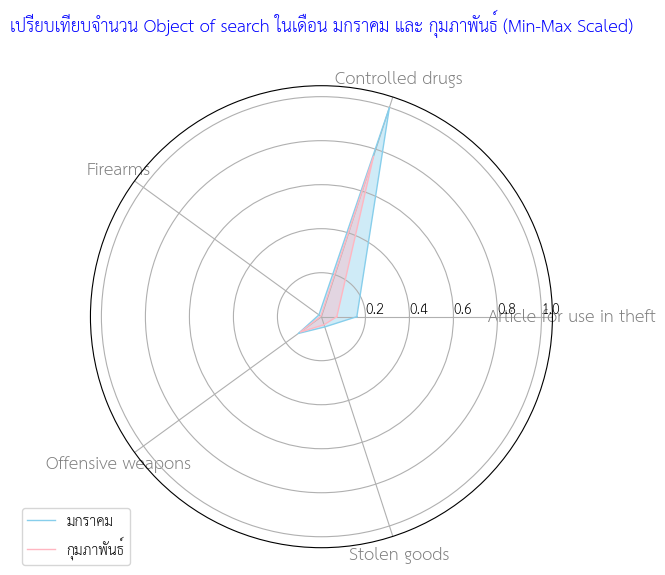

In [108]:

categories = merged_object_of_search['Object of search'].tolist()
values_jan = merged_object_of_search['Type_Jan'].tolist()
values_feb = merged_object_of_search['Type_Feb'].tolist()

# Repeat the first value to close the circular graph
values_jan += values_jan[:1]
values_feb += values_feb[:1]

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.set_rlabel_position(0) # Adjust position of radial labels


# Plot January data
ax.plot(angles, values_jan, linewidth=1, linestyle='solid', label='มกราคม', color='skyblue')
ax.fill(angles, values_jan, 'skyblue', alpha=0.4)

# Plot February data
ax.plot(angles, values_feb, linewidth=1, linestyle='solid', label='กุมภาพันธ์', color='lightpink')
ax.fill(angles, values_feb, 'lightpink', alpha=0.4)

plt.title('เปรียบเทียบจำนวน Object of search ในเดือน มกราคม และ กุมภาพันธ์ (Min-Max Scaled)', size=12, color='blue', y=1.1) # Add title and update title

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

# การแสดงผลภาษาไทย

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3640 (\N{THAI CHARACTER SA

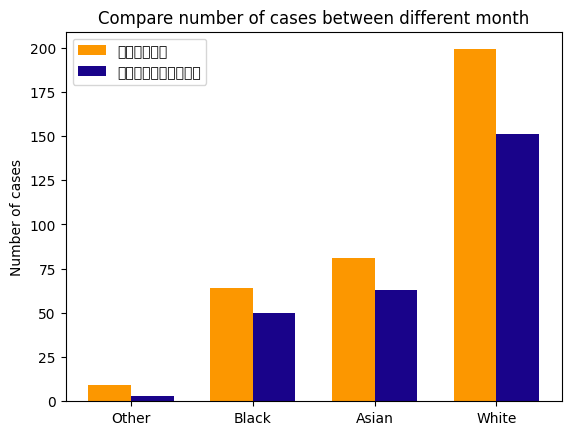

In [22]:
import numpy as np
x = np.arange(len(compared_police_eth1))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, compared_police_eth1['Type'], width, label='มกราคม', color = '#fc9700')
rects2 = ax.bar(x + width/2, compared_police_eth2['Type'], width, label='กุมภาพันธ์', color = '#19038a')

ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different month')
ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])
ax.legend();

การแสดงตัวอักษรภาษาไทยใน matplotlib
https://kamkanyawee.medium.com/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31




In [23]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [24]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

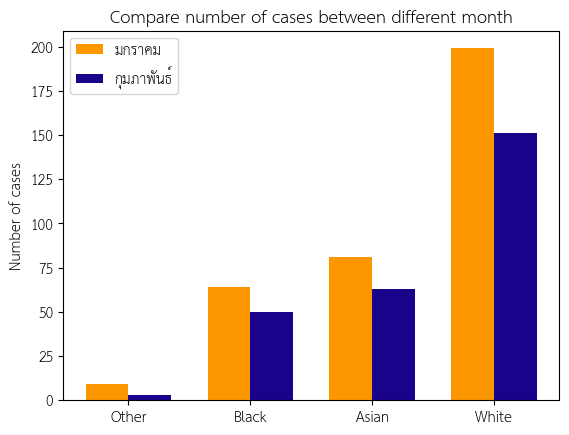

In [25]:
import numpy as np
x = np.arange(len(compared_police_eth1))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, compared_police_eth1['Type'], width, label='มกราคม', color = '#fc9700')
rects2 = ax.bar(x + width/2, compared_police_eth2['Type'], width, label='กุมภาพันธ์', color = '#19038a')

ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different month')
ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])
ax.legend();

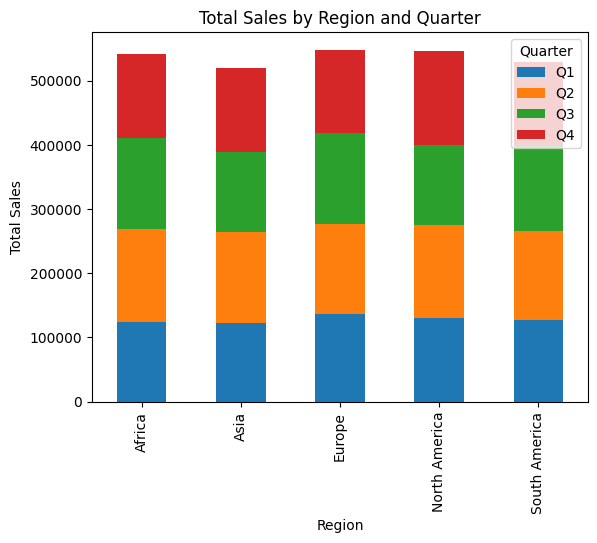

In [ ]:
# prompt: สร้าง bar chart เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ quarter ของแต่ละ region ด้วย stacked barchart

import matplotlib.pyplot as plt
# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

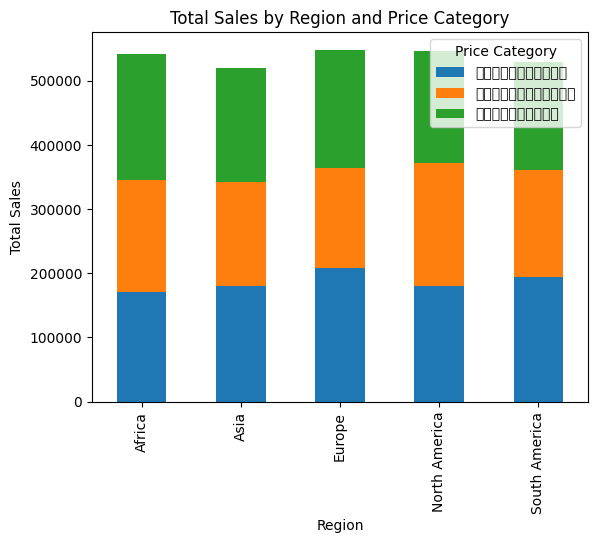

In [ ]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

import matplotlib.pyplot as plt
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()


การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

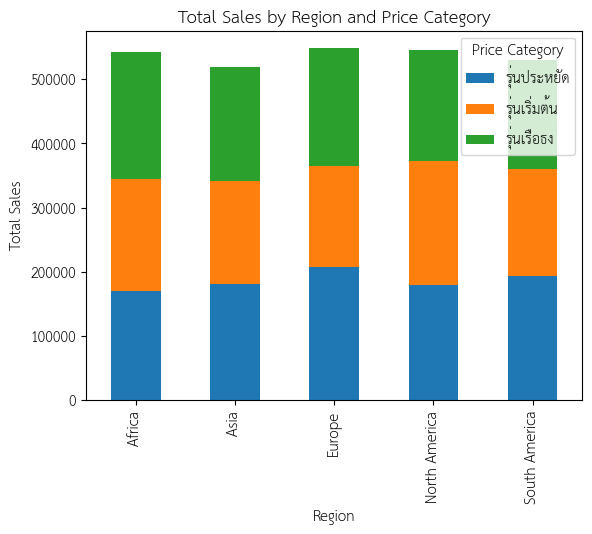

In [ ]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

import matplotlib.pyplot as plt
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()

## Plot stacked barchart ด้วย matplotlib

In [ ]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [ ]:
region_brand_sales['BrandA'].values

array([132019, 136205, 135638, 124810, 144169])

In [ ]:
region_brand_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

## plot ส่วนแรก

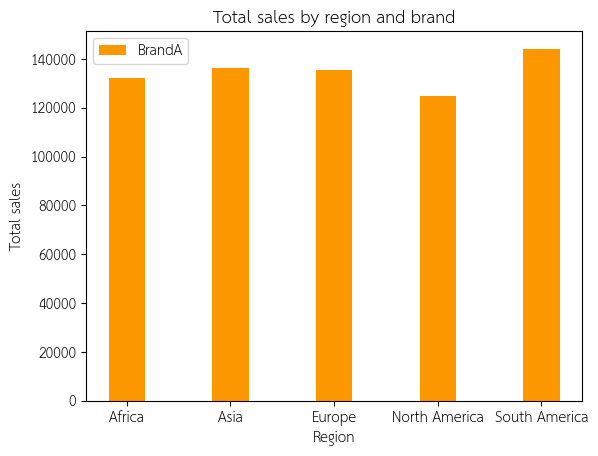

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

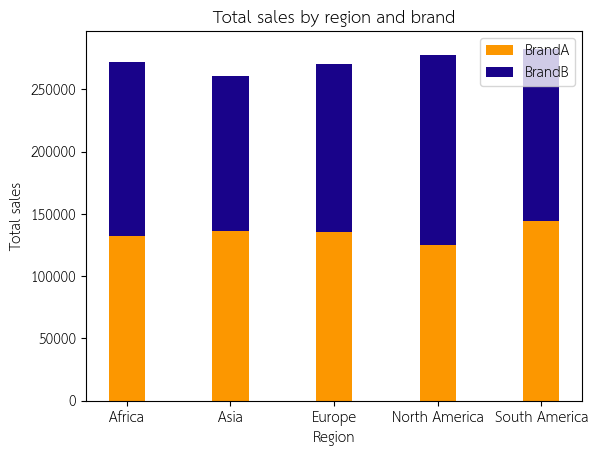

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3

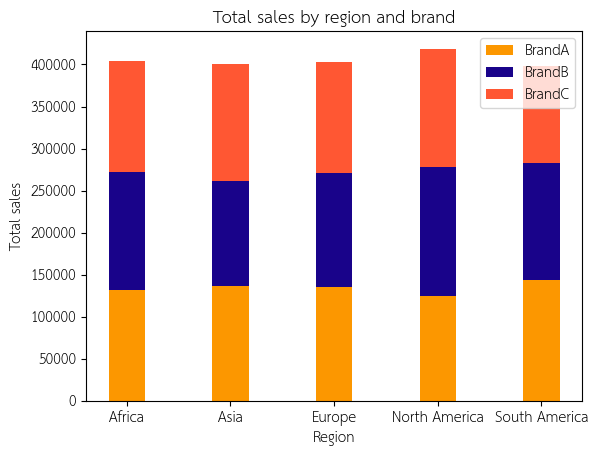

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width,
       bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width,
       bottom=region_brand_sales['BrandA'].values + region_brand_sales['BrandB'].values, label='BrandC',color = '#FF5733')


ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

# Grouped bar chart (เปรียบเทียบในกลุ่ม)

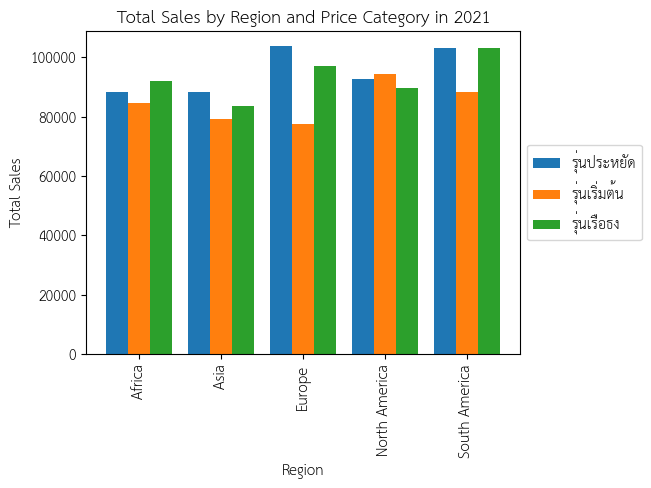

In [ ]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอกกราฟ ปรับขนาด plot ให้เล็กลง 30%

import matplotlib.pyplot as plt
# Group data by region, year, and price category, then sum sales
region_year_price_category_sales = data[data['Year'] == 2021].groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_year_price_category_sales.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()


## Plot grouped bar chart ของ หนังอินเดีย โดย แยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จาก ความยาวของหนัง

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data_india = data_india.dropna(subset=['Rating','Duration','Genre'])
data_india = data_india[['Rating','Duration','Genre']]
data_india

,Rating,Duration,Genre
1,7.0,109 min,Drama
3,4.4,110 min,"Comedy, Romance"
5,4.7,147 min,"Comedy, Drama, Musical"
6,7.4,142 min,"Drama, Romance, War"
8,5.6,82 min,"Horror, Mystery, Thriller"
...,...,...,...
15493,6.1,115 min,Drama
15494,6.2,153 min,"Biography, Drama, History"
15503,5.8,125 min,"Action, Crime, Drama"
15505,4.5,129 min,"Action, Drama"


In [ ]:
# prompt: แปลงค่าใน column duration เป็น int โดยลบ min ออกและ เปลี่ยนชนิดข้อมูลเป็น integer

# Remove " min" from the 'Duration' column and convert to integer
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)


In [ ]:
data_india.describe()

,Rating,Duration
count,5820.000000,5820.000000
mean,5.929450,132.255155
std,1.391797,26.557936
min,1.100000,21.000000
25%,5.000000,117.000000
50%,6.100000,134.000000
75%,7.000000,150.000000
max,10.000000,321.000000


In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre: drama, action, romance, horror, musical

# Create a dictionary to store the tables
genre_tables = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate through the genres and create separate tables
for genre in genres:
  genre_tables[genre] = data_india[data_india['Genre'] == genre].copy()

# Access the tables using the genre as the key
# Example:
# drama_table = genre_tables['Drama']


In [ ]:
all_table = pd.concat(genre_tables.values())
all_table

,Rating,Duration,Genre
1,7.0,109,Drama
10,6.2,96,Drama
30,7.1,116,Drama
32,5.6,168,Drama
36,4.5,94,Drama
...,...,...,...
7422,5.1,127,Musical
7770,4.6,119,Musical
10989,6.7,125,Musical
13934,5.9,103,Musical


In [ ]:
# prompt: แบ่ง duration ออกเป็น short, medium, long โดย short สั้นกว่า 60 medium 60-90 ที่เหลือ เป็น long

# Function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column
all_table['Duration Category'] = all_table['Duration'].apply(categorize_duration)
all_table

,Rating,Duration,Genre,Duration Category
1,7.0,109,Drama,long
10,6.2,96,Drama,long
30,7.1,116,Drama,long
32,5.6,168,Drama,long
36,4.5,94,Drama,long
...,...,...,...,...
7422,5.1,127,Musical,long
7770,4.6,119,Musical,long
10989,6.7,125,Musical,long
13934,5.9,103,Musical,long


In [ ]:
all_table.groupby(['Genre','Duration Category'])['Rating'].mean()

Genre    Duration Category
Action   long                 5.086228
         medium               4.966667
         short                4.500000
Drama    long                 6.404376
         medium               6.582759
         short                6.166667
Horror   long                 4.622222
         medium               4.927273
         short                4.500000
Musical  long                 5.122222
Romance  long                 5.523770
         medium               5.700000
         short                6.300000
Name: Rating, dtype: float64

In [ ]:
india_bar_data = all_table.groupby(['Genre','Duration Category'])['Rating'].mean().unstack()

In [ ]:
india_bar_data

Duration Category,long,medium,short
Genre,,,
Action,5.086228,4.966667,4.500000
Drama,6.404376,6.582759,6.166667
Horror,4.622222,4.927273,4.500000
Musical,5.122222,NaN,NaN
Romance,5.523770,5.700000,6.300000


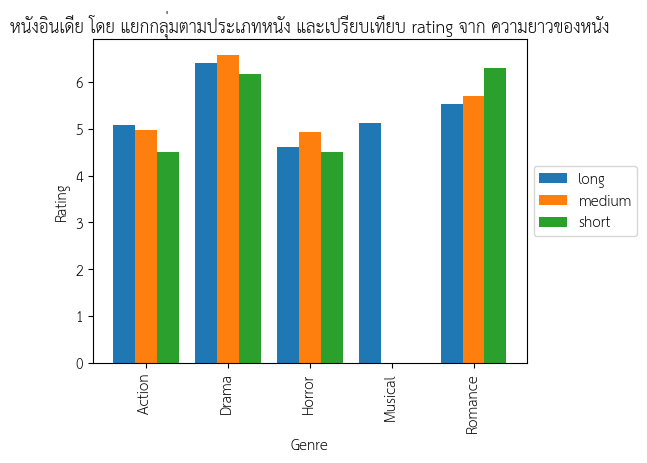

In [ ]:
ax = india_bar_data.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('หนังอินเดีย โดย แยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จาก ความยาวของหนัง')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

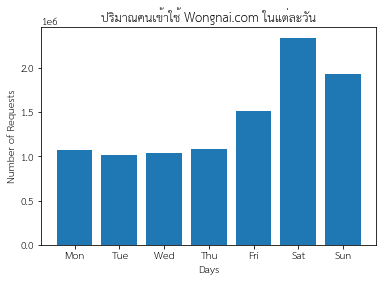

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

Text(0, 0.5, 'Number of Requests')

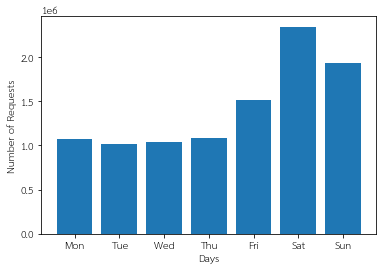

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

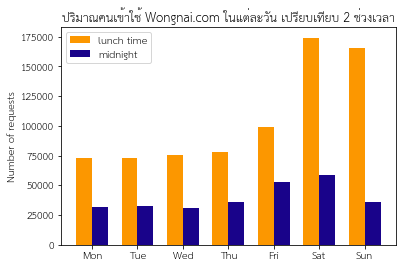

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

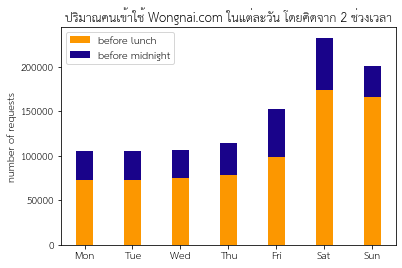

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

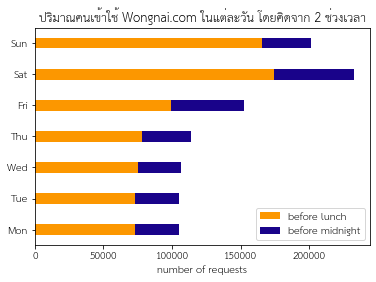

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

(array([  2.,   2.,   2.,   4.,   9.,  14.,  17.,  39.,  47.,  59.,  90.,
        144., 159., 202., 288., 325., 388., 430., 507., 537., 604., 642.,
        650., 615., 590., 546., 534., 507., 429., 357., 323., 233., 196.,
        171., 113.,  73.,  51.,  36.,  26.,  22.,   5.,   3.,   2.,   2.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([ 44.90650513,  47.32901741,  49.7515297 ,  52.17404198,
         54.59655427,  57.01906656,  59.44157884,  61.86409113,
         64.28660341,  66.7091157 ,  69.13162798,  71.55414027,
         73.97665256,  76.39916484,  78.82167713,  81.24418941,
         83.6667017 ,  86.08921398,  88.51172627,  90.93423856,
         93.35675084,  95.77926313,  98.20177541, 100.6242877 ,
        103.04679998, 105.46931227, 107.89182456, 110.31433684,
        112.73684913, 115.15936141, 117.5818737 , 120.00438598,
        122.42689827, 124.84941056, 127.27192284, 129.69443513,
        132.11694741, 134.5394597 , 136.96197198, 139.38448427,
        141.806996

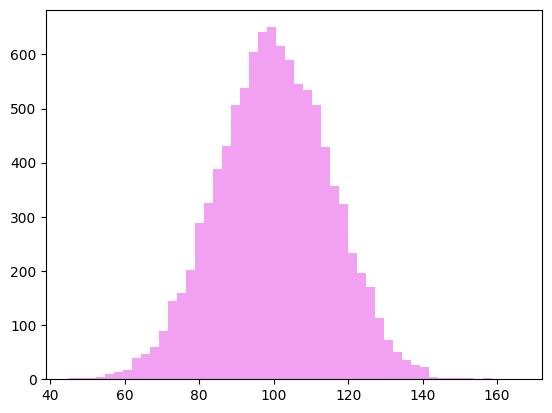

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, facecolor = 'violet', alpha = 0.75)

## ทดสอบกับข้อมูลหนังอินเดีย

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
len(set(data_india.dropna(subset=['Genre'])['Genre']))

485

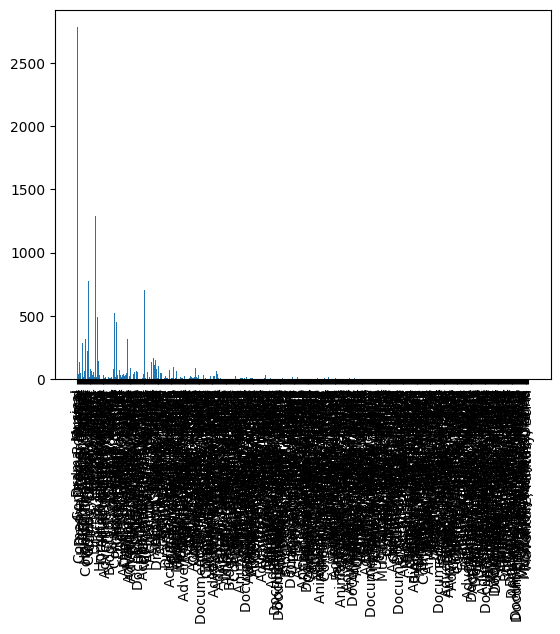

In [ ]:
plt.hist(data_india.dropna(subset=['Genre'])['Genre'],bins = len(set(data_india.dropna(subset=['Genre'])['Genre'])))
plt.xticks(rotation='vertical');

In [ ]:
data_india['Genre'].str.split(',', expand=True)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None
...,...,...,...
15504,Action,None,None
15505,Action,Drama,None
15506,Action,None,None
15507,Action,None,None


In [ ]:
data_india = data_india.dropna(subset=['Genre'])

In [ ]:
# prompt: split value in column genre by ',' and make more column for each of those

import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genre_split = data_india['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None


In [ ]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  data_india[col] = data_india[col].str.strip() if data_india[col].dtype == 'object' else data_india[col]


In [ ]:
allGenre = list(data_india['Genre1'])+list(data_india['Genre2'])+list(data_india['Genre3'])

In [ ]:
len(set(allGenre))

25

In [ ]:
allGenre[-20:]

[' Romance',
 ' Mystery',
 ' Mystery',
 ' Romance',
 ' Family',
 ' Thriller',
 ' Thriller',
 ' Thriller',
 ' Mystery',
 ' Family',
 ' Musical',
 ' Sci-Fi',
 ' Family',
 ' Family',
 ' Thriller',
 ' Comedy',
 ' History',
 ' Drama',
 ' Drama',
 ' Drama']

In [ ]:
allGenre[:13]

['Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Horror',
 'Action',
 'Drama',
 'Horror',
 'Horror']

In [ ]:
# prompt: delete all None from the allGenre list

allGenre = [x for x in allGenre if x is not None]


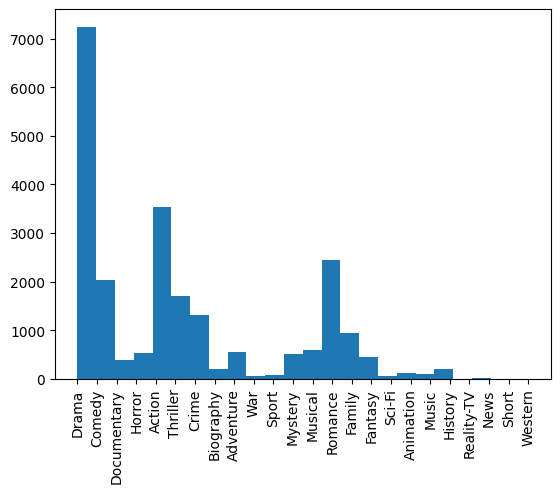

In [ ]:
plt.hist(allGenre,bins = len(set(allGenre)))
plt.xticks(rotation='vertical');

# Quiz15 หาพระเอก-นางเอก ที่มักจะแสดงคู่กัน ด้วย Histogram (พระเอก actor1, นางเอก actor2)

## Tree map

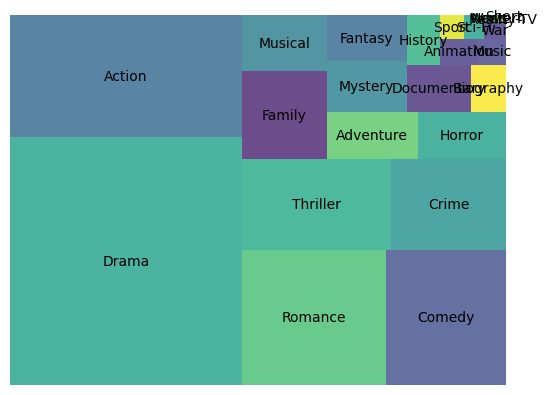

In [ ]:
# prompt: plot treemap of the genre

import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify

import squarify

# Assuming 'allGenre' contains the list of genres you want to plot
genre_counts = pd.Series(allGenre).value_counts()

# Create the treemap
squarify.plot(sizes=genre_counts.values, label=genre_counts.index, alpha=.8 )
plt.axis('off')
plt.show()


## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

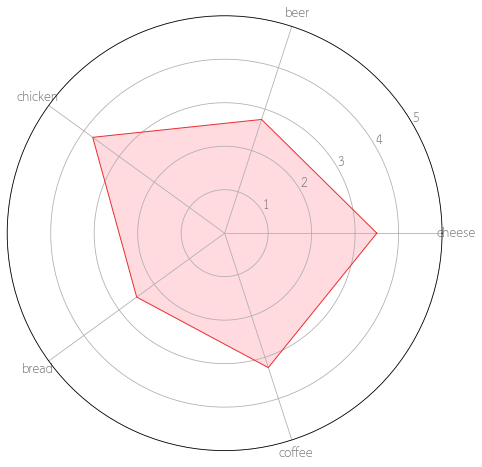

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

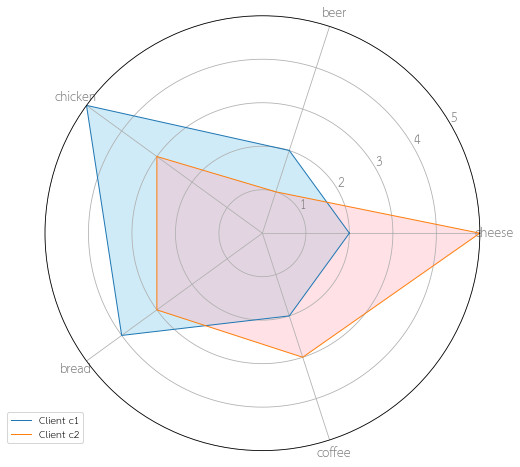

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# HW9 present radar chart data india